In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('CNCnoise_1.csv', header=None)
data = data.rename(columns={0: "noise"})
data.head()

,noise
0,1911
1,1933
2,1901
3,1939
4,1914


# Z-score and IQR
noise average - real time noise

<Axes: xlabel='None', ylabel='noise'>

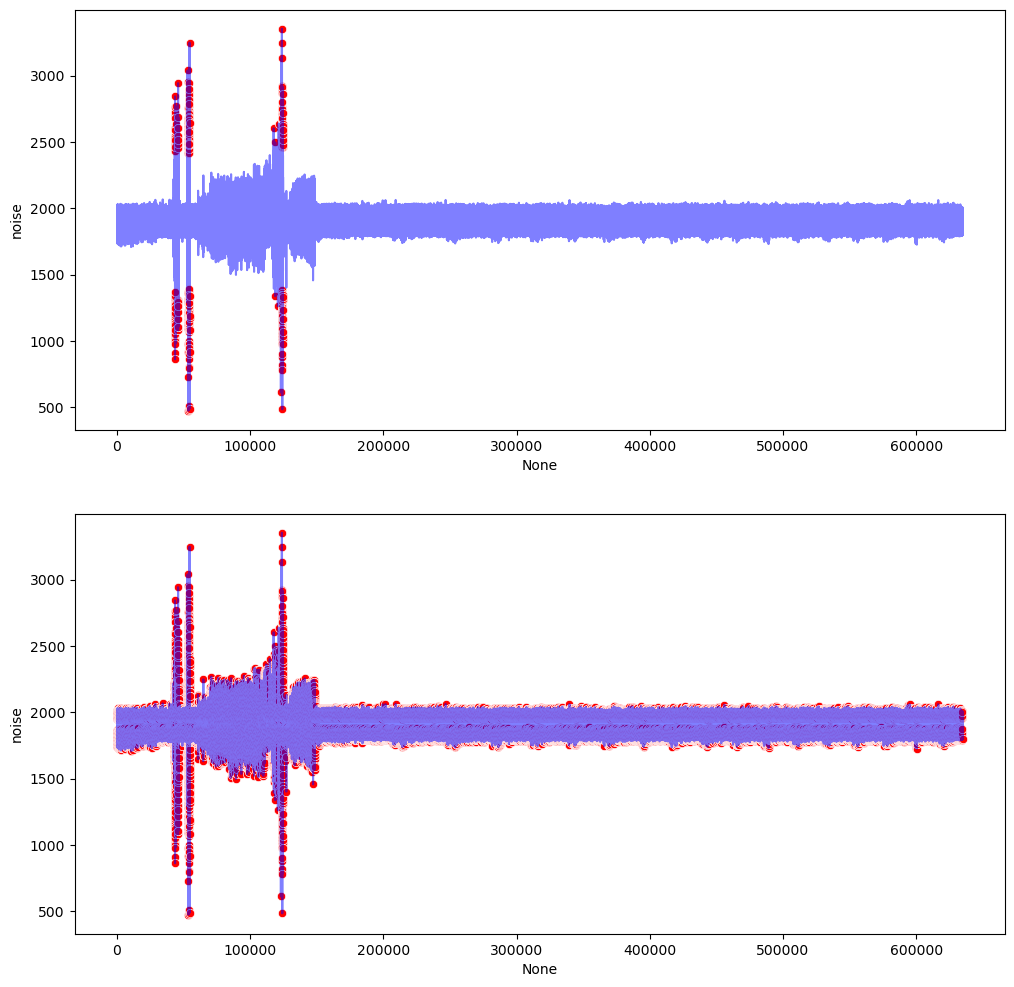

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [5]:
data['bnd_average'] = data['noise']
rolling_n = 100 ## 값이 작을수록 이상치 추출 성능이 더 좋아짐
data['bnd_average'] = data['noise'].rolling(window=rolling_n).mean()
data['bnd_average'] = data['bnd_average'].fillna(data['noise'])
data['diff_noise_average'] = data['noise'] - data['bnd_average']

#---------------------------------------z-score------------------------------------------------
data['z_score'] = (data['diff_noise_average'] - data['diff_noise_average'].mean()) / data['diff_noise_average'].std()
data['is_outlier_z_score'] = abs(data['z_score']) > 10

fig, ax = plt.subplots(nrows=2, figsize=(12,12))

plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y=data['noise'], color='blue', alpha=0.5, ax=ax[0])

# 이상치만 빨간 점으로 표시
sns.scatterplot(
    x=data.index[data['is_outlier_z_score']],
    y=data['noise'][data['is_outlier_z_score']],
    color='red',
    ax=ax[0]
)

#---------------------------------------IQR----------------------------------------------------
Q1 = data['diff_noise_average'].quantile(0.25)
Q3 = data['diff_noise_average'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['is_outlier_IQR'] = (data['diff_noise_average'] < lower_bound) | (data['diff_noise_average'] > upper_bound)

plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y=data['noise'], color='blue', alpha=0.5, ax=ax[1])

# 이상치만 빨간 점으로 표시
sns.scatterplot(
    x=data.index[data['is_outlier_IQR']],
    y=data['noise'][data['is_outlier_IQR']],
    color='red',
    ax=ax[1]
)

IQR 방법으로 찾은 이상치가 비정상적으로 많음 -> 데이터의 왜곡이 존재함

'\ndiff_noise_average 변수가 중앙(0)에 너무 몰려있음\n(데이터의 왜곡 존재 -> z-score를 사용하거나 IQR에 곱하는 임계값 1.5를 변형하여 문제를 해결할 수 있을 것 같음)\n'

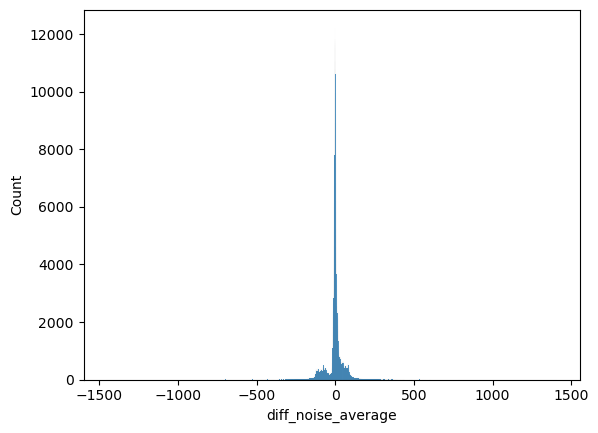

In [ ]:
sns.histplot(data['diff_noise_average']) 

# diff_noise_average 변수가 중앙(0)에 너무 몰려있음
# (데이터의 왜곡 존재 -> z-score를 사용하거나 IQR에 곱하는 임계값 1.5를 변형하여 문제를 해결할 수 있을 것 같음)


<Axes: xlabel='None', ylabel='noise'>

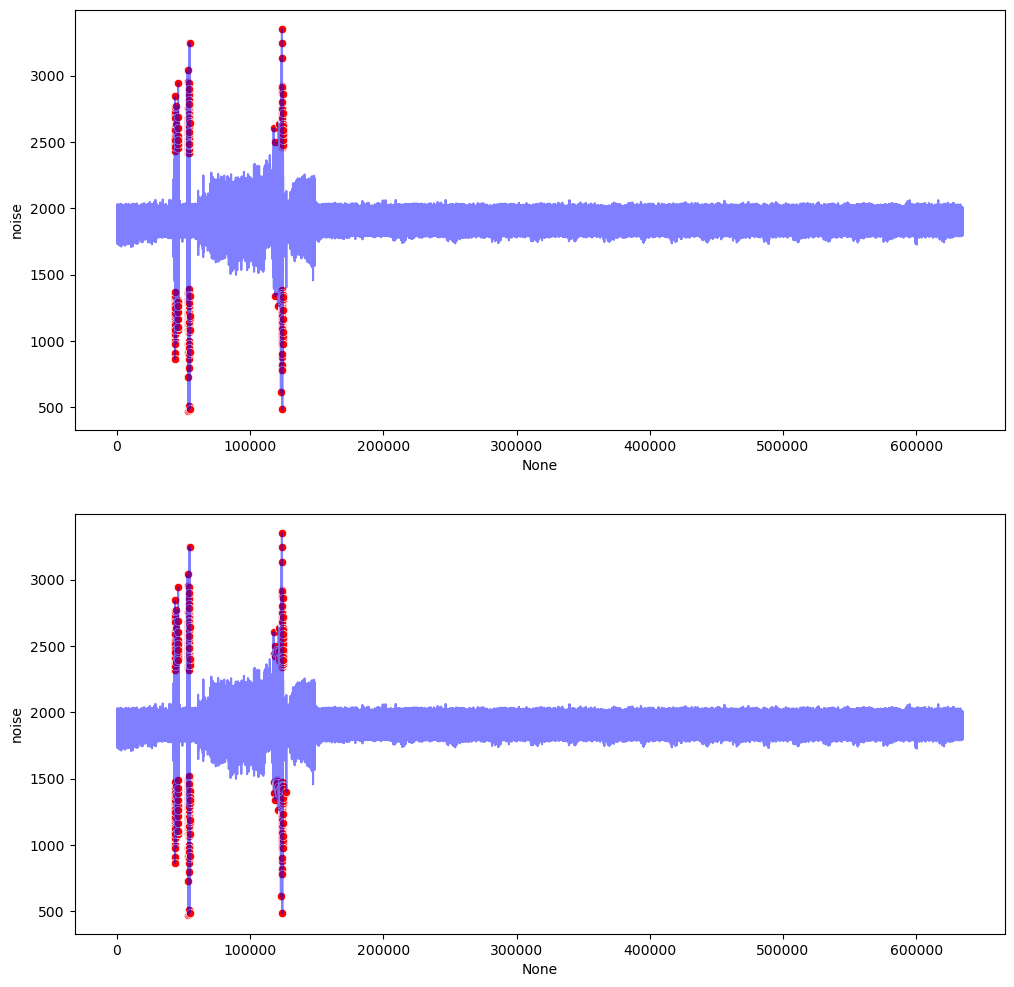

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [9]:
data['bnd_average'] = data['noise']
rolling_n = 100 ## 값이 작을수록 이상치 추출 성능이 더 좋아짐
data['bnd_average'] = data['noise'].rolling(window=rolling_n).mean()
data['bnd_average'] = data['bnd_average'].fillna(data['noise'])
data['diff_noise_average'] = data['noise'] - data['bnd_average']

#---------------------------------------z-score------------------------------------------------
data['z_score'] = (data['diff_noise_average'] - data['diff_noise_average'].mean()) / data['diff_noise_average'].std()
data['is_outlier_z_score'] = abs(data['z_score']) > 10

fig, ax = plt.subplots(nrows=2, figsize=(12,12))

plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y=data['noise'], color='blue', alpha=0.5, ax=ax[0])

# 이상치만 빨간 점으로 표시
sns.scatterplot(
    x=data.index[data['is_outlier_z_score']],
    y=data['noise'][data['is_outlier_z_score']],
    color='red',
    ax=ax[0]
)

#---------------------------------------IQR----------------------------------------------------
Q1 = data['diff_noise_average'].quantile(0.25)
Q3 = data['diff_noise_average'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 25 * IQR
upper_bound = Q3 + 25 * IQR

data['is_outlier_IQR'] = (data['diff_noise_average'] < lower_bound) | (data['diff_noise_average'] > upper_bound)

plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y=data['noise'], color='blue', alpha=0.5, ax=ax[1])

# 이상치만 빨간 점으로 표시
sns.scatterplot(
    x=data.index[data['is_outlier_IQR']],
    y=data['noise'][data['is_outlier_IQR']],
    color='red',
    ax=ax[1]
)

<Axes: xlabel='None', ylabel='noise'>

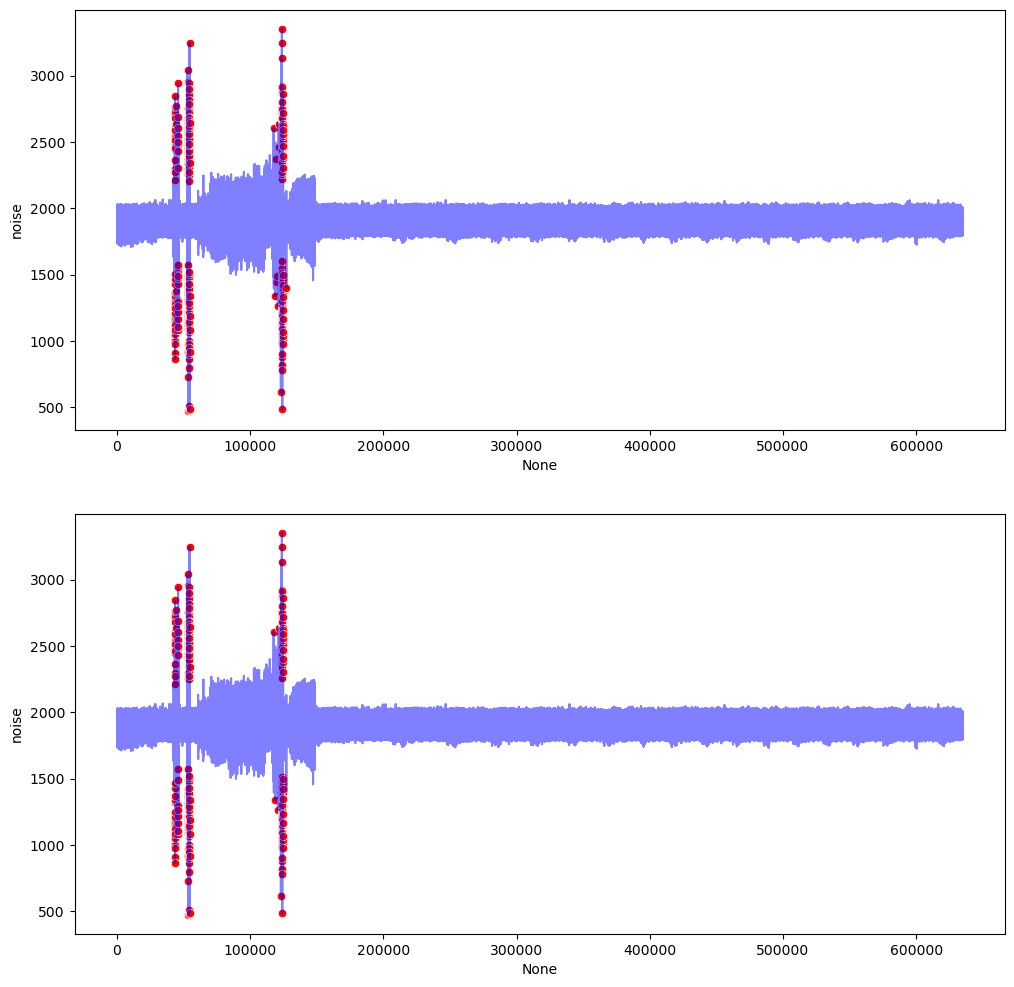

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [126]:
data['bnd_average'] = data['noise']
rolling_n = 10 ## 값이 작을수록 이상치 추출 성능이 더 좋아짐
data['bnd_average'] = data['noise'].rolling(window=rolling_n).sum()/rolling_n
data['bnd_average'] = data['bnd_average'].fillna(data['noise'])
data['diff_noise_average'] = data['noise'] - data['bnd_average']

#---------------------------------------z-score------------------------------------------------
data['z_score'] = (data['diff_noise_average'] - data['diff_noise_average'].mean()) / data['diff_noise_average'].std()
data['is_outlier_z_score'] = abs(data['z_score']) > 10

fig, ax = plt.subplots(nrows=2, figsize=(12,12))

plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y=data['noise'], color='blue', alpha=0.5, ax=ax[0])

# 이상치만 빨간 점으로 표시
sns.scatterplot(
    x=data.index[data['is_outlier_z_score']],
    y=data['noise'][data['is_outlier_z_score']],
    color='red',
    ax=ax[0]
)

#---------------------------------------IQR----------------------------------------------------
Q1 = data['diff_noise_average'].quantile(0.25)
Q3 = data['diff_noise_average'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 25 * IQR
upper_bound = Q3 + 25 * IQR

data['is_outlier_IQR'] = (data['diff_noise_average'] < lower_bound) | (data['diff_noise_average'] > upper_bound)

plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y=data['noise'], color='blue', alpha=0.5, ax=ax[1])

# 이상치만 빨간 점으로 표시
sns.scatterplot(
    x=data.index[data['is_outlier_IQR']],
    y=data['noise'][data['is_outlier_IQR']],
    color='red',
    ax=ax[1]
)

<Axes: xlabel='None', ylabel='noise'>

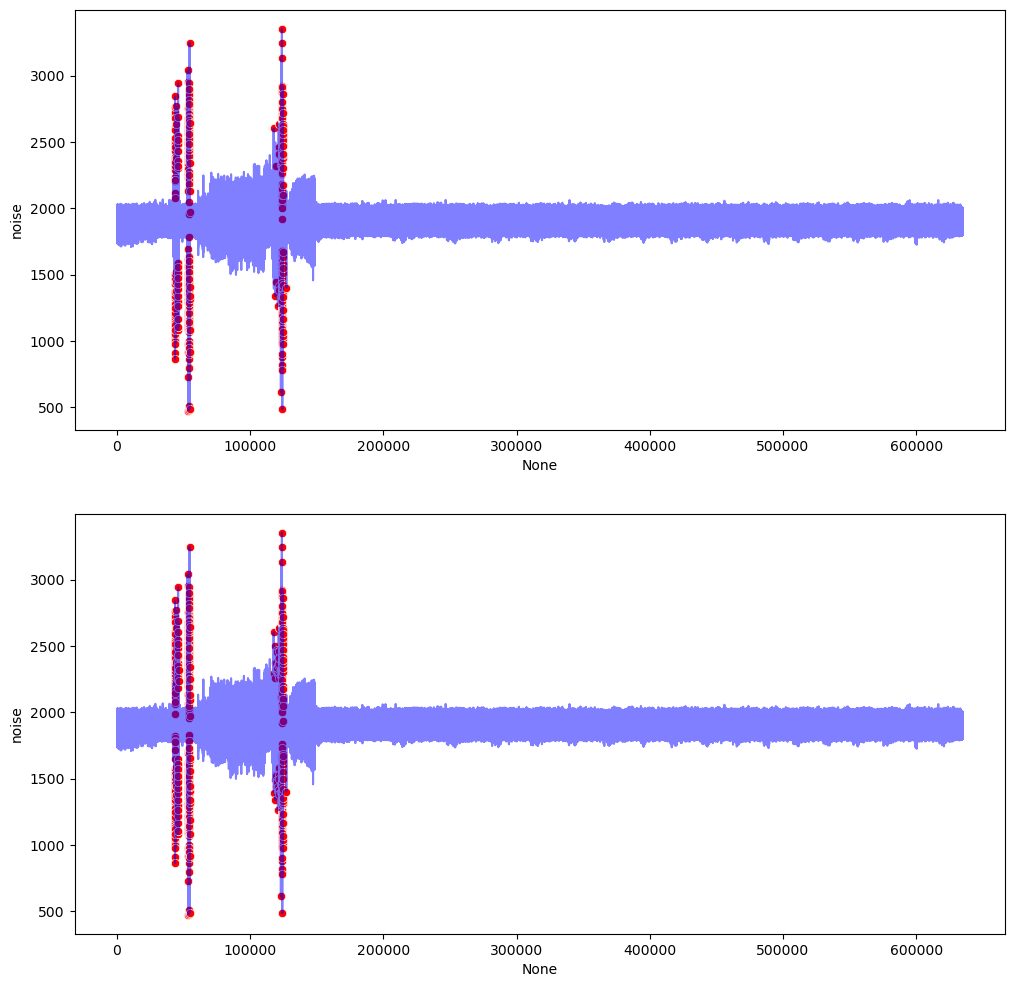

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [127]:
data['bnd_average'] = data['noise']
rolling_n = 5 ## 값이 작을수록 이상치 추출 성능이 더 좋아짐
data['bnd_average'] = data['noise'].rolling(window=rolling_n).sum()/rolling_n
data['bnd_average'] = data['bnd_average'].fillna(data['noise'])
data['diff_noise_average'] = data['noise'] - data['bnd_average']

#---------------------------------------z-score------------------------------------------------
data['z_score'] = (data['diff_noise_average'] - data['diff_noise_average'].mean()) / data['diff_noise_average'].std()
data['is_outlier_z_score'] = abs(data['z_score']) > 10

fig, ax = plt.subplots(nrows=2, figsize=(12,12))

plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y=data['noise'], color='blue', alpha=0.5, ax=ax[0])

# 이상치만 빨간 점으로 표시
sns.scatterplot(
    x=data.index[data['is_outlier_z_score']],
    y=data['noise'][data['is_outlier_z_score']],
    color='red',
    ax=ax[0]
)

#---------------------------------------IQR----------------------------------------------------
Q1 = data['diff_noise_average'].quantile(0.25)
Q3 = data['diff_noise_average'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 25 * IQR
upper_bound = Q3 + 25 * IQR

data['is_outlier_IQR'] = (data['diff_noise_average'] < lower_bound) | (data['diff_noise_average'] > upper_bound)

plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y=data['noise'], color='blue', alpha=0.5, ax=ax[1])

# 이상치만 빨간 점으로 표시
sns.scatterplot(
    x=data.index[data['is_outlier_IQR']],
    y=data['noise'][data['is_outlier_IQR']],
    color='red',
    ax=ax[1]
)

<Axes: xlabel='None', ylabel='noise'>

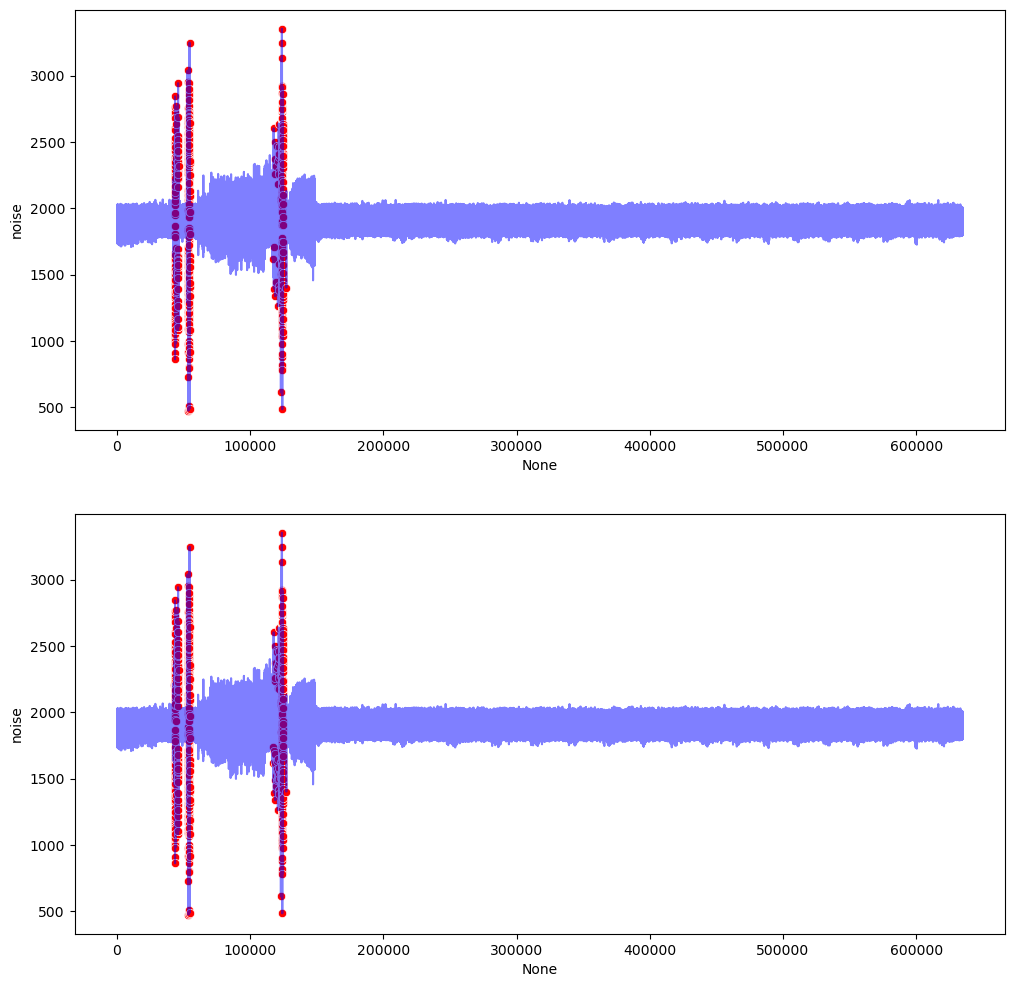

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [128]:
data['bnd_average'] = data['noise']
rolling_n = 3 ## 값이 작을수록 이상치 추출 성능이 더 좋아짐
data['bnd_average'] = data['noise'].rolling(window=rolling_n).sum()/rolling_n
data['bnd_average'] = data['bnd_average'].fillna(data['noise'])
data['diff_noise_average'] = data['noise'] - data['bnd_average']

#---------------------------------------z-score------------------------------------------------
data['z_score'] = (data['diff_noise_average'] - data['diff_noise_average'].mean()) / data['diff_noise_average'].std()
data['is_outlier_z_score'] = abs(data['z_score']) > 10

fig, ax = plt.subplots(nrows=2, figsize=(12,12))

plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y=data['noise'], color='blue', alpha=0.5, ax=ax[0])

# 이상치만 빨간 점으로 표시
sns.scatterplot(
    x=data.index[data['is_outlier_z_score']],
    y=data['noise'][data['is_outlier_z_score']],
    color='red',
    ax=ax[0]
)

#---------------------------------------IQR----------------------------------------------------
Q1 = data['diff_noise_average'].quantile(0.25)
Q3 = data['diff_noise_average'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 25 * IQR
upper_bound = Q3 + 25 * IQR

data['is_outlier_IQR'] = (data['diff_noise_average'] < lower_bound) | (data['diff_noise_average'] > upper_bound)

plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y=data['noise'], color='blue', alpha=0.5, ax=ax[1])

# 이상치만 빨간 점으로 표시
sns.scatterplot(
    x=data.index[data['is_outlier_IQR']],
    y=data['noise'][data['is_outlier_IQR']],
    color='red',
    ax=ax[1]
)